In [1]:
from data import create_dummy_data
from metrics import cal_gmean
from gse import GSE

from plot_ultils import create_domain_plot, create_hyperplane_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
X_maj, X_min = create_dummy_data(100, ir=4)
X_total = np.concatenate([X_maj, X_min], 0)
labels = np.concatenate([np.zeros(X_maj.shape[0]),np.ones(X_min.shape[0])], 0)

X_train, X_test, y_train, y_test = train_test_split(X_total, labels, test_size=0.3, random_state=42)

X_maj = X_train[y_train==0]
X_min = X_train[y_train==1]

X_test_maj = X_test[y_test==0]
X_test_min = X_test[y_test==1]

gse_learner = GSE(P=2, R=0.5)
X_del = gse_learner.fit(X_maj, X_min)

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.29      1.00      0.45         5

    accuracy                           0.60        30
   macro avg       0.65      0.76      0.57        30
weighted avg       0.88      0.60      0.65        30



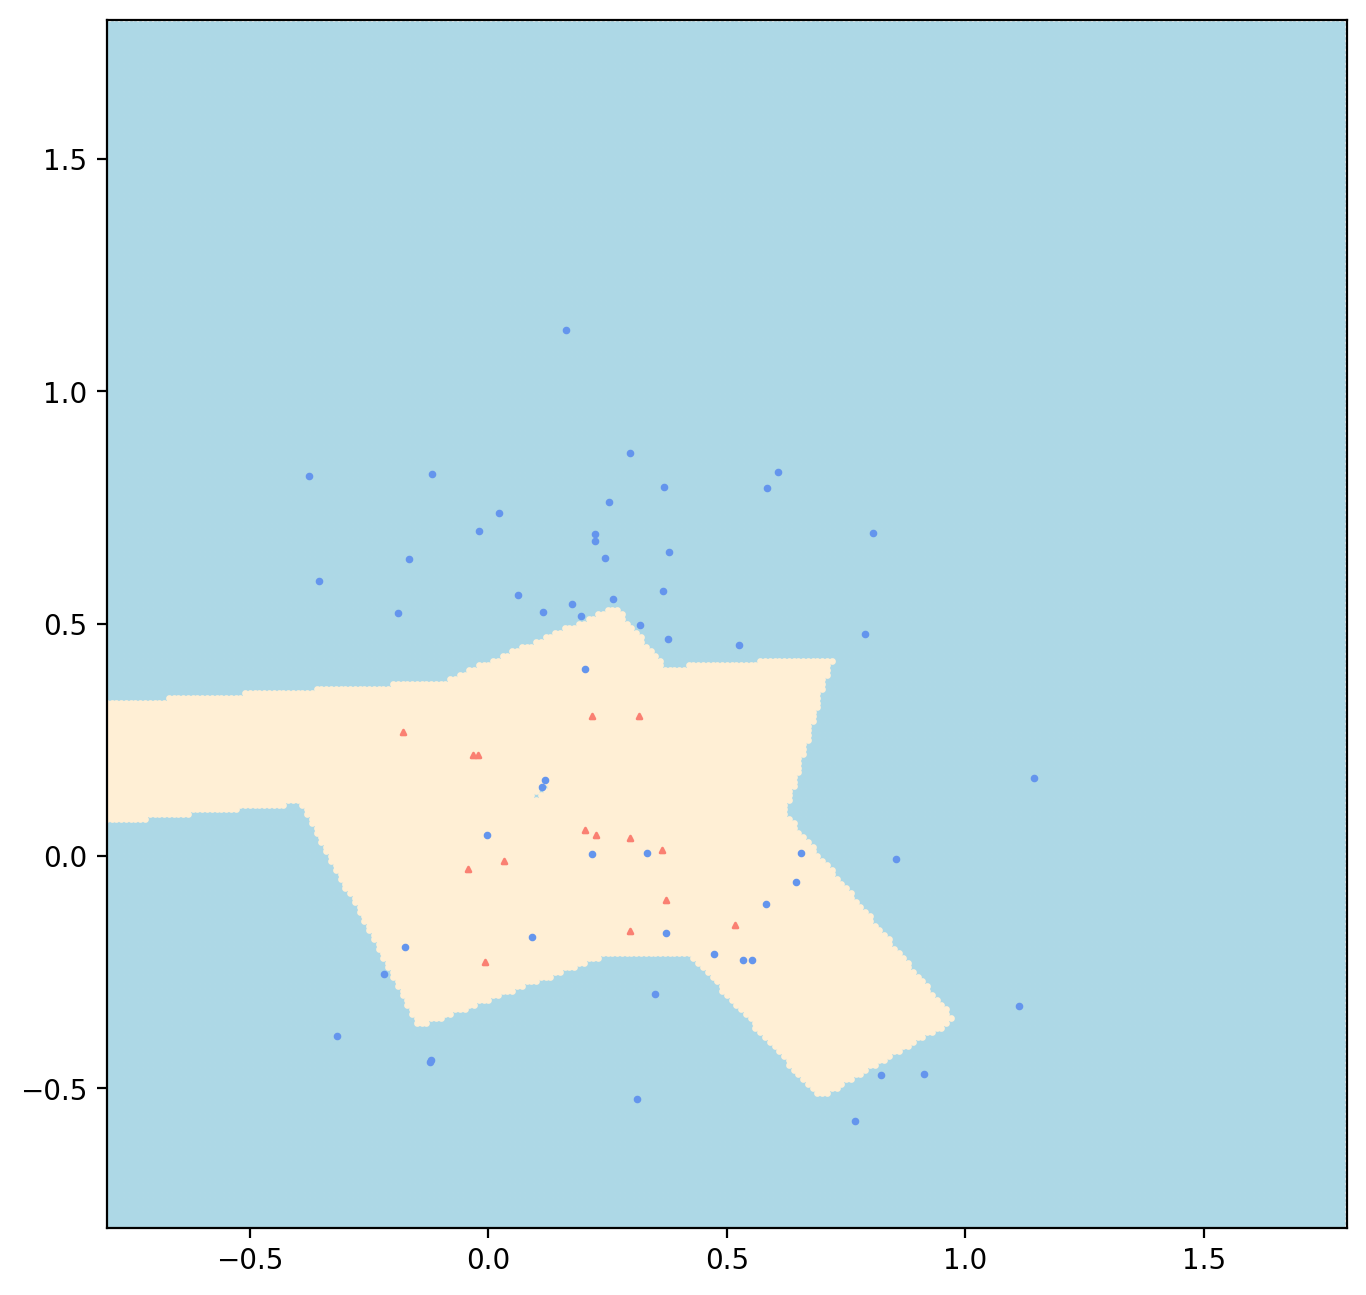

In [47]:
max_iter_plot = 2
pred = gse_learner.predict(X_test)
print(classification_report(y_test, pred, labels=[0, 1]))

fig=plt.figure(figsize=(8,8), dpi= 200, facecolor='w', edgecolor='k')
plt.xlim([-0.8, 1.8])
plt.ylim([-0.8, 1.8])
maj_domain, min_domain = create_domain_plot(gse_learner, -0.8, 1.8)
plt.scatter(maj_domain[:,0], maj_domain[:,1], marker="o",c="lightblue", s=2.0)
plt.scatter(min_domain[:,0], min_domain[:,1], marker="o",c="papayawhip", s= 2.0)
plt.scatter(X_maj[:,0], X_maj[:,1], marker="o",c="cornflowerblue", s=3)
plt.scatter(X_min[:,0], X_min[:,1], marker="^",c="salmon", s=3)

# subset_classifiers = gse_learner.subset_classifiers[0]
# for i, basic_classifier in enumerate(subset_classifiers):
#     for (w, phi) in basic_classifier:
#         hyper_x, hyper_y = create_hyperplane_plot(w,phi,-0.8, 1.8)
#         plt.plot(hyper_x, hyper_y)
#     if i == max_iter_plot:
#         break

# for i, x_del in enumerate(X_del):
#     plt.scatter(x_del[0][:,0], x_del[0][:,1], marker="o",)
#     if i == max_iter_plot:
#         break

# plt.scatter(X_test_maj[:,0], X_test_maj[:,1], marker="x",c="blue")
# plt.scatter(X_test_min[:,0], X_test_min[:,1], marker="^",c="orange")
plt.show()

In [37]:
df = pd.read_csv('./data/ecoli3.csv')
labels = np.array([1 if x == "positive" else 0 for x in df["Class"].values])
df = df.drop(columns=["Class"])
X_total = df.values
X_train, X_test, y_train, y_test = train_test_split(X_total, labels, test_size=0.3, random_state=42, stratify=labels)
X_maj = X_train[y_train==0]
X_min = X_train[y_train==1]
gse_learner = GSE(P=2, R=0.5)
classifiers = gse_learner.fit(X_maj, X_min)
pred = gse_learner.predict(X_test)
g_mean = cal_gmean(y_test, pred)
print(f"gmean = {g_mean}")
print(classification_report(y_test, pred, labels=[0, 1]))


gmean = 0.9101004495564368
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        90
           1       0.56      0.91      0.69        11

    accuracy                           0.91       101
   macro avg       0.77      0.91      0.82       101
weighted avg       0.94      0.91      0.92       101

